In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [4]:
sample = [3, 5, 4, 6, 2, 3, 4, 5, 5, 4]
mu0 = 3

ttest_1samp(sample, mu0)

Ttest_1sampResult(statistic=2.905487990874558, pvalue=0.01743886090834335)

In [8]:
# checking t-stat
t_obs = (np.mean(sample) - mu0) / np.std(sample, ddof=1) * np.sqrt(len(sample))
t_obs

2.9054879908745583

In [9]:
from scipy.stats import t

In [11]:
T = t(df=len(sample) - 1)
T

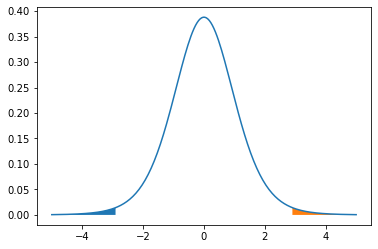

In [16]:
x = np.linspace(-5, 5, 200)

plt.plot(x, T.pdf(x))
x_left = np.linspace(-5, -t_obs, 200)
x_right = np.linspace(t_obs, 5, 200)
plt.fill_between(x_left, T.pdf(x_left))
plt.fill_between(x_right, T.pdf(x_right))
plt.show()

In [19]:
# lets find p-value
p_val = T.cdf(-t_obs) * 2
p_val

0.017438860908343328

#### Using simulations to check t-test

In [22]:
# let's check how many time t-test will make type 1 error when sampling from ~Norm(0, 1)
sample_size = 3
iterations = int(10e3)
significance_level = 0.05
fp_counter = 0
mu0 = 0 # since we are using standard normal distribution
for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, p_val = ttest_1samp(sample, mu0)
    if p_val < significance_level:
        fp_counter += 1

print(f'The result should be close to {int(significance_level * 100)}% :', fp_counter / iterations)

The result should be close to 5% : 0.051


In [27]:
# let's check how many time t-test will make type 1 error when sampling from ~Uniform([-, 1])
sample_size = 29  # the larger size,, the better results due to CLT
iterations = int(10e3)
significance_level = 0.05
fp_counter = 0
mu0 = 0 # since we are using [-1, 1] uniform distribution
for i in range(iterations):
    sample = np.random.uniform(low=-1, high=1, size=sample_size)
    t_stat, p_val = ttest_1samp(sample, mu0)
    if p_val < significance_level:
        fp_counter += 1

print(f'The result should be close to {int(significance_level * 100)}% :', fp_counter / iterations)

The result should be close to 5% : 0.0528


In [31]:
# let's check how many time t-test will make type 1 error when sampling from descrete rv
sample_size = 50  # the larger size,, the better results due to CLT
iterations = int(10e3)
significance_level = 0.05
population = [2, 3, 4, 1, 2.2, 4.4, 3.3, 6.6, 1000]
fp_counter = 0
mu0 = np.mean(population)
for i in range(iterations):
    sample = np.random.choice(population, size=sample_size)
    t_stat, p_val = ttest_1samp(sample, mu0)
    if p_val < significance_level:
        fp_counter += 1

print(f'The result should be close to {int(significance_level * 100)}% :', fp_counter / iterations)

The result should be close to 5% : 0.0813


#### One tailed t-test

$$H_0: \mu = \mu_0$$
$$H_1: \mu > \mu_0$$

In [32]:
# let's check how many time t-test will make type 1 error when sampling from ~Norm(0, 1)
sample_size = 3
iterations = int(10e3)
significance_level = 0.05
fp_counter = 0
mu0 = 0 # since we are using standard normal distribution
for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, p_val = ttest_1samp(sample, mu0)
    p_val /= 2  # as it's one-tailed now
    
    if t_stat > 0 and p_val < significance_level:
        # rejecting null hypothesis
        fp_counter += 1

print(f'The result should be close to {int(significance_level * 100)}% :', fp_counter / iterations)

The result should be close to 5% : 0.0496


#### 2 sample t-test

In [24]:
sample1 = [47, 48, 51, 52, 52, 50, 47, 46, 52, 48, 49, 55, 52, 49, 52, 47, 50, 53, 48, 52]
sample2 = [60, 58, 61, 61, 54, 57, 59, 63, 60, 61]

In [25]:
print(np.mean(sample1), np.mean(sample2))

50.0 59.4


In [26]:
t_obs, p_val = ttest_ind(sample1, sample2, equal_var=False)
print(t_obs, p_val)

-9.623189997698113 1.9624057660484677e-08


In [20]:
sample1 = [28, 33, 29, 31, 31]
sample2 = [31, 36, 32, 32, 33]

In [22]:
t_obs, p_val = ttest_ind(sample1, sample2, equal_var=False)
print(t_obs, p_val)
p_val/2

-1.9595917942265415 0.08571854967273392


0.04285927483636696